# ライブラリのインストール

In [44]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image
import librosa
import cv2

In [45]:
wav_list = ["2023_proto_crack","2023_proto_normal","2023_sa_crack","2023_sa_non_wheez","2023_sa_normal","2023_sa_wheez"]

# 画像ファイルの確認

In [46]:
stetho = "Prototype"#"Sound_Analyzer"
path = '../Spectrogram/'+stetho+'/mel_spec/'
csv_files = os.listdir(path)
csv_files = sorted(csv_files)
print(csv_files)

['.DS_Store', '3427059_Ch0_mel_spec.png', '4495349_Ch0_mel_spec.png', '7520020_Ch0_mel_spec.png', '8503185_Ch0_mel_spec.png', '9710964_Ch0_part1_mel_spec.png', '9710964_Ch0_part2_mel_spec.png', '9710964_Ch0_part3_mel_spec.png', 'cut_gray', 'gray', 'normal01_Ch0_mel_spec.png', 'normal02_Ch0_mel_spec.png', 'normal03_Ch0_mel_spec.png', 'normal04_Ch0_mel_spec.png', 'normal05_Ch0_mel_spec.png', 'normal06_Ch0_mel_spec.png', 'normal_m01_Ch0_mel_spec.png', 'normal_m02_Ch0_mel_spec.png', 'normal_m03_Ch0_mel_spec.png', 'normal_m04_Ch0_mel_spec.png']


In [47]:
# 音声ファイルのパスを指定します。
train_audio_path = '../Sound_Data/'+wav_list[0]+'/'
wav_files = os.listdir(train_audio_path)
wav_files = sorted(wav_files)
print(wav_files)

['3427059_Ch0.wav', '4495349_Ch0.wav', '7520020_Ch0.wav', '8482510_Ch0.wav', '8503185_Ch0.wav', '9710964_Ch0.wav']


# 生成する画像のファイル名の一部を定義
画像保存、読み取りの際に利用

In [48]:
file = csv_files[3] #pngファイル名
wav = wav_files[2]
disease = wav_list[0] #受診者の肺音の症状
save_flag = 1

f = wav[0:-4]
#f = wav[0:-4]+"_part3"
filename=f+"_mel_spec"
grayname=f+"_gray_mel_spec"
rate=10000

print("pngファイル:\t\t"+file)
print("wavファイル:\t\t"+wav)
print("データの種類:\t\t"+disease)
print("拡張子抜きファイル名:\t"+f)
print("Specファイル名:\t\t"+filename)
print("Grayファイル名:\t\t"+grayname)

pngファイル:		7520020_Ch0_mel_spec.png
wavファイル:		7520020_Ch0.wav
データの種類:		2023_proto_crack
拡張子抜きファイル名:	7520020_Ch0
Specファイル名:		7520020_Ch0_mel_spec
Grayファイル名:		7520020_Ch0_gray_mel_spec


In [49]:
samples, sample_rate = librosa.load(str(train_audio_path) + wav, sr=rate, mono=False)

In [50]:
N = samples.shape[0] # 標本データ数(要素数)を返す
print("元の標本数:\t"+str(N))
padding_list = (sample_rate*20-N)*[0]
samples = np.concatenate([samples, np.array(padding_list)])
#samples = samples[400000:600000]

N = samples.shape[0] # 標本データ数(要素数)を返す
L = len(samples)/sample_rate # 時間(長さ)の算出
plot_time = np.linspace(0, L, N) # グラフ描画のための時間軸の生成


print("file_name:\t"+str(filename))
print("disease:\t"+str(disease))
print("name:\t\t"+str(f))
print("サンプリング周波数:"+str(sample_rate))
print("標本数:\t\t"+str(N))
print("総時間:\t\t"+str(L))
print("データの型:\t"+str(samples.dtype))
print("12セグメント秒:\t"+str(L/132))
print("チャンネル数:\t"+str(samples.ndim))
print("追加の標本数:\t"+str(len(padding_list)))
print("20秒の標本数:\t"+str(sample_rate*20))


# 見附実験用
#print(L/132.0)
#print((L/132.0)*8)
#print(((L/132.0)*8)+(L/132.0))


np.linspace(0, len(samples)/sample_rate, len(samples))
t = librosa.times_like(samples, sr=sample_rate*512)
print("時間配列最後の秒数:"+str(t[-1]))

元の標本数:	150000
file_name:	7520020_Ch0_mel_spec
disease:	2023_proto_crack
name:		7520020_Ch0
サンプリング周波数:10000
標本数:		200000
総時間:		20.0
データの型:	float64
12セグメント秒:	0.15151515151515152
チャンネル数:	1
追加の標本数:	50000
20秒の標本数:	200000
時間配列最後の秒数:19.9999


# スペクトログラムの確認

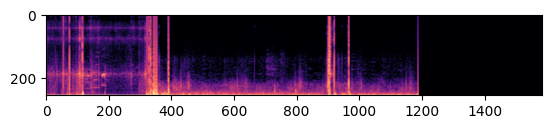

In [51]:
im = np.array(Image.open(path+file))
plt.imshow(im)

## データの形状を確認

In [52]:
print(im.shape)

(256, 1584, 4)


## グレースケール変換

(256, 1584)


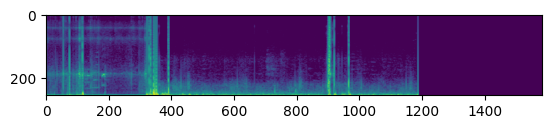

In [53]:
im_dif = cv2.imread(path+file)
im_gray = cv2.cvtColor(im_dif, cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray)
print(im_gray.shape)
if save_flag == 1:
    cv2.imwrite("../Spectrogram/"+stetho+"/mel_spec/gray/"+grayname+".png", im_gray)
else:
    print("not_save")

## 呼吸特徴が存在する低周波抽出

(128, 1584)


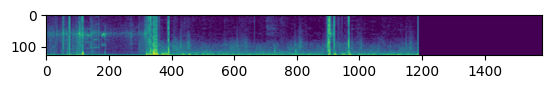

In [54]:
im_cut = im_gray[128:257,:]
plt.imshow(im_cut)
print(im_cut.shape)

In [55]:
imsave = Image.fromarray(im_cut)
if save_flag == 1:
    imsave.save("../Spectrogram/"+stetho+"/mel_spec/cut_gray/"+grayname+".png")
else:
    print("not_save")